Summarize half daily environmental data from the SB at the surface.

In [36]:
%matplotlib inline
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import glob

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cartopy.crs as ccrs
import cartopy
import sb_tools

In [47]:
sns.set_theme(style="darkgrid")
sns.color_palette("rainbow", as_cmap=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})

title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '13', 'color': 'black'}

## Load SB env data
Load CTD data from stations 7-17.

In [48]:
ship_stn_name = ['0882','0889','0908','0920','0926','0942','0952','0959','0969','0984','1003']
path = 'F:/GLIDER2018/SeaPatches2018_tokt_all/CTD_data'

In [49]:
SP_CTD = np.empty([len(ship_stn_name),4000,25])
SP_CTD[:,:,:] = np.nan
for ind in np.arange(len(ship_stn_name)):
    filename = path+'/stnr'+ship_stn_name[ind]+'.xls.xlsx'
    SP_env_df = pd.read_excel(filename,header=0, engine="openpyxl")
    length = SP_env_df.shape[0]
    SP_CTD[ind,0:length,:] = SP_env_df.to_numpy()
print(SP_env_df.columns.tolist())

['scan: Scan Count', 'depSM: Depth [salt water, m]', 'prDM: Pressure, Digiquartz [db]', 't090C: Temperature [ITS-90, deg C]', 'c0S/m: Conductivity [S/m]', 'sal00: Salinity, Practical [PSU]', 'sigma-t00: Density [sigma-t, kg/m^3 ]', 'svCM: Sound Velocity [Chen-Millero, m/s]', 'flSP: Fluorescence, Seapoint', 'seaTurbMtr: Turbidity, Seapoint [FTU]', 'nbf: Bottles Fired', 'latitude: Latitude [deg]', 'longitude: Longitude [deg]', 'timeJ: Julian Days', 'sbeox0Mm/L: Oxygen, SBE 43 [umol/l]', 'sbeox0PS: Oxygen, SBE 43 [% saturation]', 'spar: SPAR/Surface Irradiance', 'par/log: PAR/Logarithmic, Satlantic [umol photons/m2/s]', 'depSM: Depth [salt water, m], lat = 70.4925', 'potemp090C: Potential Temperature [ITS-90, deg C]', 'sal00: Salinity, Practical [PSU].1', 'sigma-�00: Density [sigma-theta, kg/m^3]', 'svCM: Sound Velocity [Chen-Millero, m/s].1', 'oxsolML/L: Oxygen Saturation, Garcia & Gordon [ml/l]', 'flag: flag']


# Plot the profiles

## Plot profiles, salinity and temp

In [50]:
# Set the limits of the profiles. Area of interest is 3 to 100 m.
surface_limit = 3 #m
deep_limit = 100 #m

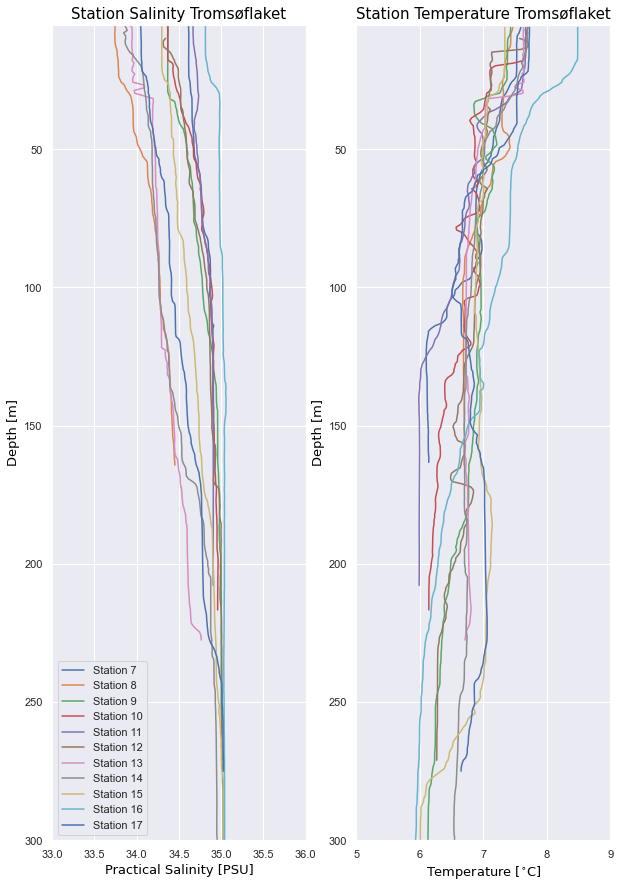

In [51]:
# Warnings from NaN when using np.where are annoying and harmless...
np.warnings.filterwarnings('ignore')

plt.figure(figsize=(10,15))
plt.subplot(121)
for ind in np.arange(len(ship_stn_name)):
    min_d = np.min(np.where(SP_CTD[ind,:,1]>surface_limit))
    plt.plot(SP_CTD[ind,min_d:,5],SP_CTD[ind,min_d:,1])
plt.ylim([300, 5])
plt.xlim([33,36])
plt.title('Station Salinity Tromsøflaket', title_font)
plt.xlabel('Practical Salinity [PSU]', axis_font)
plt.ylabel('Depth [m]', axis_font)
plt.legend(['Station 7','Station 8','Station 9','Station 10','Station 11','Station 12', 'Station 13','Station 14','Station 15','Station 16','Station 17'])
    
plt.subplot(122)
for ind in np.arange(len(ship_stn_name)):
    min_d = np.min(np.where(SP_CTD[ind,:,1]>5))
    plt.plot(SP_CTD[ind,min_d:,3],SP_CTD[ind,min_d:,1])
plt.ylim([300,5])
plt.xlim([5,9])
plt.title('Station Temperature Tromsøflaket', title_font)
plt.xlabel('Temperature [$^{\circ}$C]', axis_font)
plt.ylabel('Depth [m]', axis_font);
    

## Plot T-S diagram

Text(0.5, 1.0, 'Water Masses in Tromsøflaket - June 2018')

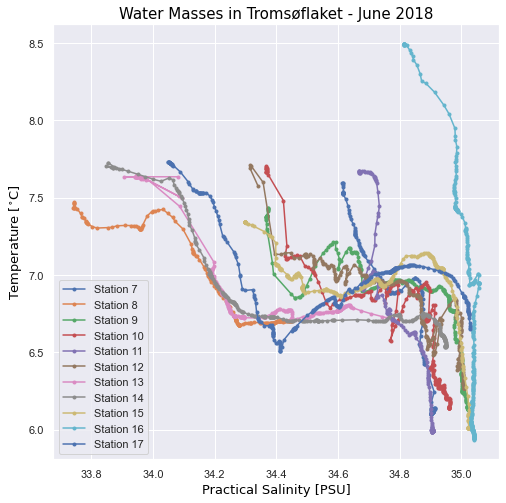

In [52]:
# Warnings from NaN when using np.where are annoying and harmless...
np.warnings.filterwarnings('ignore')

plt.figure(figsize=(8,8))
for ind in np.arange(len(ship_stn_name)):
    # Select data between limits
    max_d = np.max(np.where(SP_CTD[ind,:,1]<300))
    min_d = np.min(np.where(SP_CTD[ind,:,1]>3))
    plt.plot(SP_CTD[ind,min_d:max_d,5],SP_CTD[ind,min_d:max_d,3],'.-')
    

plt.legend(['Station 7','Station 8','Station 9','Station 10','Station 11','Station 12', 'Station 13','Station 14','Station 15','Station 16','Station 17'])
plt.ylabel('Temperature [$^{\circ}$C]', axis_font)
plt.xlabel('Practical Salinity [PSU]', axis_font)
plt.title('Water Masses in Tromsøflaket - June 2018', title_font)

Most stations have a similar salinity and temperature profiles that vary minimally between 3 and 300 m. They have the same bottom water mass, with a slighly warmed and fresher surface (1.5 degree warmer and <1 PSU fresher). This is a well mixed area, the surface warming or runoff has not warmed and freshen the surface water much yet.
Station 16 is the only annomaly. It is 14 nmi (26 km) from the next nearest station. The salinity varies very little from 35 PSU but the temperature gradually decreases by 2.5 degrees C over 300 m.

# 333kHz zone
Focus on top 100 m where epipelagic estimates are

Text(0.5, 1.0, 'Water Masses in Tromsøflaket - June 2018')

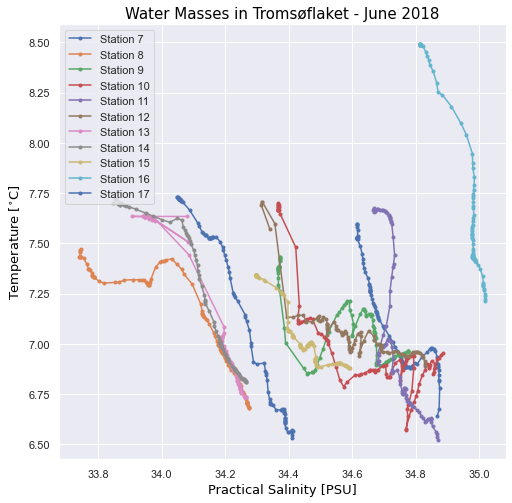

In [53]:
# Warnings from NaN when using np.where are annoying and harmless...
np.warnings.filterwarnings('ignore')

plt.figure(figsize=(8,8))
for ind in np.arange(len(ship_stn_name)):
    # Select data between limits
    max_d = np.max(np.where(SP_CTD[ind,:,1]<deep_limit))
    min_d = np.min(np.where(SP_CTD[ind,:,1]>surface_limit))
    plt.plot(SP_CTD[ind,min_d:max_d,5],SP_CTD[ind,min_d:max_d,3],'.-')
    

plt.legend(['Station 7','Station 8','Station 9','Station 10','Station 11','Station 12', 'Station 13','Station 14','Station 15','Station 16','Station 17'])
plt.ylabel('Temperature [$^{\circ}$C]', axis_font)
plt.xlabel('Practical Salinity [PSU]', axis_font)
plt.title('Water Masses in Tromsøflaket - June 2018', title_font)

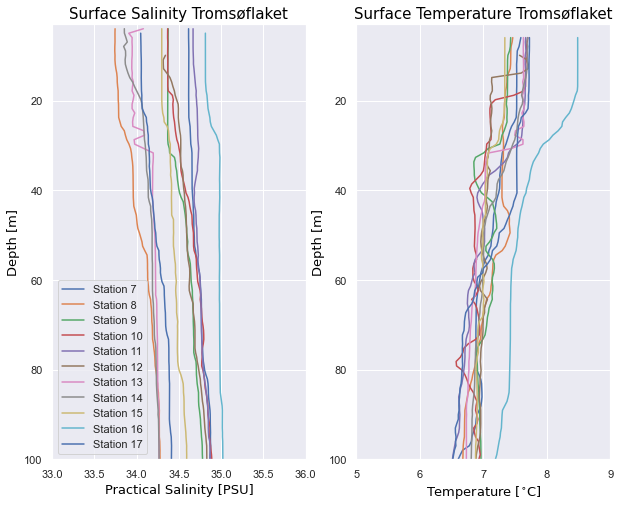

In [54]:
# Warnings from NaN when using np.where are annoying and harmless...
np.warnings.filterwarnings('ignore')

plt.figure(figsize=(10,8))
plt.subplot(121)
for ind in np.arange(len(ship_stn_name)):
    min_d = np.min(np.where(SP_CTD[ind,:,1]>surface_limit))
    plt.plot(SP_CTD[ind,min_d:,5],SP_CTD[ind,min_d:,1])
plt.ylim([deep_limit, surface_limit])
plt.xlim([33,36])
plt.title('Surface Salinity Tromsøflaket', title_font)
plt.xlabel('Practical Salinity [PSU]', axis_font)
plt.ylabel('Depth [m]', axis_font)
plt.legend(['Station 7','Station 8','Station 9','Station 10','Station 11','Station 12', 'Station 13','Station 14','Station 15','Station 16','Station 17'])
    
plt.subplot(122)
for ind in np.arange(len(ship_stn_name)):
    min_d = np.min(np.where(SP_CTD[ind,:,1]>5))
    plt.plot(SP_CTD[ind,min_d:,3],SP_CTD[ind,min_d:,1])
plt.ylim([deep_limit, surface_limit])
plt.xlim([5,9])
plt.title('Surface Temperature Tromsøflaket', title_font)
plt.xlabel('Temperature [$^{\circ}$C]', axis_font)
plt.ylabel('Depth [m]', axis_font);

Text(0.5, 1.0, 'Surface Water Masses in Tromsøflaket - June 2018')

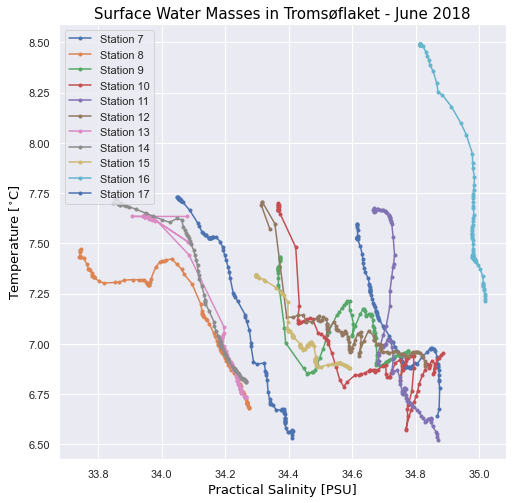

In [55]:
# Warnings from NaN when using np.where are annoying and harmless...
np.warnings.filterwarnings('ignore')

plt.figure(figsize=(8,8))
for ind in np.arange(len(ship_stn_name)):
    # Select data between limits
    max_d = np.max(np.where(SP_CTD[ind,:,1]<deep_limit))
    min_d = np.min(np.where(SP_CTD[ind,:,1]>surface_limit))
    plt.plot(SP_CTD[ind,min_d:max_d,5],SP_CTD[ind,min_d:max_d,3],'.-')
    
plt.legend(['Station 7','Station 8','Station 9','Station 10','Station 11','Station 12', 'Station 13','Station 14','Station 15','Station 16','Station 17'])
plt.ylabel('Temperature [$^{\circ}$C]', axis_font)
plt.xlabel('Practical Salinity [PSU]', axis_font)
plt.title('Surface Water Masses in Tromsøflaket - June 2018', title_font)

The temperature profiles are mostly the same, except for station 16, getting colder with depth ~ 7.5 at the surface to ~6.5 at 100m. The salinity has a slight difference with the coastal stations (8,13 and 14) with the fresher profiles. Then the middle profiles have a fresher surface and at depth have salinities similar to the stations futher off the coast- this describes stations 9,12,15 and 10. The furthest from the coast are slightly saltier throughout the surface epipelagic profiles (7 and 11, exception is station 10). The saltiest and warmest station is 16, which is off the shelf.